<a href="https://colab.research.google.com/github/Bia-byte/trabalho_Markov/blob/main/Trabalho_markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Letra C: P(absorção no passo 3 | X0=1) = 0.147
Letra D: tempos médios até absorção t1,t2 = [3.33333333 3.33333333]
Letra E: probabilidades de absorção em 0/3 =
[[0.66666667 0.33333333]
 [0.33333333 0.66666667]]



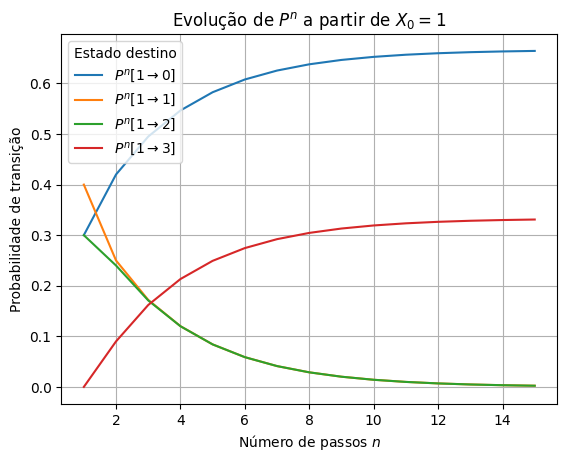

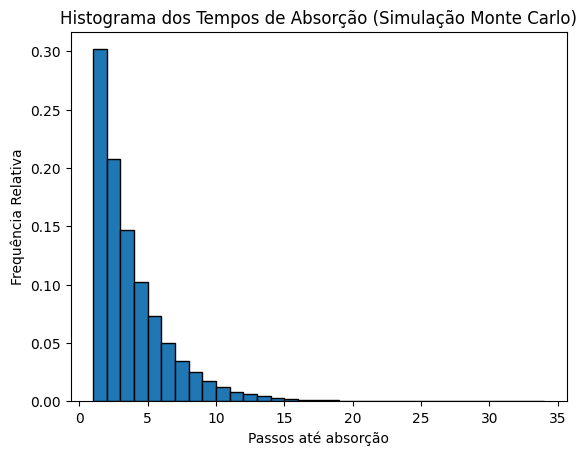

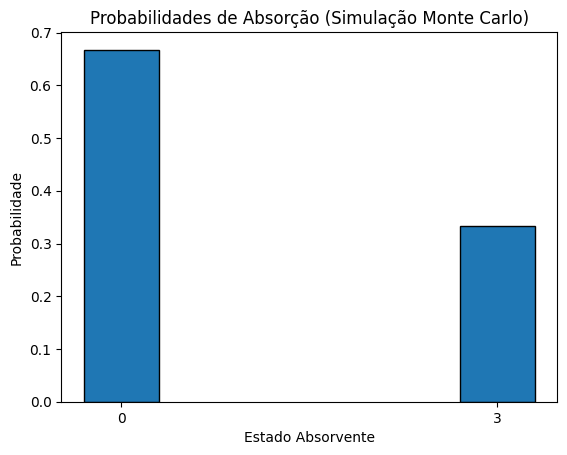

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

n = 100000  # Número de trajetórias a serem simuladas usando o método de Monte Carlo

# Letra B: Definindo a matriz de transição P para a Cadeia de Markov com 4 estados [0, 1, 2, 3]
# Os estados 0 e 3 são absorventes, pois uma vez que o sistema entra nesses estados, ele permanece neles.
P = np.array([
    [1.0, 0.0, 0.0, 0.0],  # Estado 0: Probabilidade de permanecer em 0 é 1.0
    [0.3, 0.4, 0.3, 0.0],  # Estado 1: Probabilidades de transição para 0, 1, 2, 3 são 0.3, 0.4, 0.3, 0.0 respectivamente
    [0.0, 0.3, 0.4, 0.3],  # Estado 2: Probabilidades de transição para 0, 1, 2, 3 são 0.0, 0.3, 0.4, 0.3 respectivamente
    [0.0, 0.0, 0.0, 1.0]   # Estado 3: Probabilidade de permanecer em 3 é 1.0
])

# Extraindo as submatrizes Q e R da matriz de transição P
# Q representa as probabilidades de transição entre os estados transientes (1 e 2).
Q = P[1:3, 1:3]
# R representa as probabilidades de transição dos estados transientes (1 e 2) para os estados absorventes (0 e 3).
R = P[1:3, [0, 3]]

# Calculando a matriz fundamental N
# A matriz fundamental N = (I - Q)^{-1} fornece o número médio de vezes que o processo visita cada estado transiente antes de ser absorvido.
I2 = np.eye(2)  # Matriz identidade de tamanho 2x2
N = np.linalg.inv(I2 - Q)  # Inversa da diferença entre a matriz identidade e a submatriz Q

# Letra C: Calculando a probabilidade de absorção exatamente no passo 3, dado que o estado inicial X0 é 1
# P^2 representa a matriz de transição após 2 passos. P^2[1, [0, 3]].sum() é a probabilidade de estar em um estado absorvente após 2 passos partindo do estado 1.
P2 = matrix_power(P, 2)
# P^3 representa a matriz de transição após 3 passos. P^3[1, [0, 3]].sum() é a probabilidade de estar em um estado absorvente após 3 passos partindo do estado 1.
P3 = matrix_power(P, 3)
# A diferença entre essas probabilidades nos dá a probabilidade de ser absorvido *exatamente* no passo 3.
p_step3 = P3[1, [0, 3]].sum() - P2[1, [0, 3]].sum()

# Letra D: Calculando o tempo médio até a absorção para cada estado transiente
# O vetor t = N . [1, 1]^T fornece o tempo médio até a absorção a partir de cada estado transiente.
t = N.dot(np.ones(2))  # Multiplicando a matriz fundamental N por um vetor de uns

# Letra E: Calculando as probabilidades de absorção final em cada estado absorvente
# A matriz B = N . R fornece as probabilidades de ser absorvido em cada estado absorvente (colunas) a partir de cada estado transiente (linhas).
B = N.dot(R)  # Multiplicando a matriz fundamental N pela matriz R

# Impressão dos resultados analíticos calculados
print(f"Letra C: P(absorção no passo 3 | X0=1) = {p_step3:.3f}")
print(f"Letra D: tempos médios até absorção t1,t2 = {t}")
print(f"Letra E: probabilidades de absorção em 0/3 =\n{B}\n")

# Letra F: Simulação de Monte Carlo das trajetórias até a absorção usando a função de distribuição cumulativa (CDF)
abs_times = []  # Lista para armazenar os tempos de absorção de cada trajetória
abs_states = [] # Lista para armazenar o estado absorvente final de cada trajetória
for s in range(n):
    state = 1  # Começando sempre do estado inicial 1
    for step in range(1, 100):  # Limitando o número máximo de passos para evitar loops infinitos (para fins de simulação)
        u = np.random.rand()  # Gerando um número aleatório uniforme entre 0 e 1
        cdf = np.cumsum(P[state, :])  # Calculando a função de distribuição cumulativa para o estado atual
        state = np.searchsorted(cdf, u)  # Encontrando o próximo estado com base no número aleatório e na CDF
        if state in (0, 3):  # Se o próximo estado for um estado absorvente
            abs_times.append(step)  # Registra o tempo de absorção
            abs_states.append(state) # Registra o estado absorvente
            break  # Termina a simulação para esta trajetória

# Convertendo as listas de tempos e estados de absorção para arrays NumPy para facilitar o plot
abs_times = np.array(abs_times)
abs_states = np.array(abs_states)

# Plot das probabilidades de transição P^n a partir do estado inicial X0=1
max_n = 15  # Número máximo de passos para mostrar no gráfico
pn = np.zeros((max_n, 4))  # Inicializando uma matriz para armazenar as probabilidades de transição ao longo do tempo
for k in range(1, max_n + 1):
    pn[k-1, :] = matrix_power(P, k)[1, :]  # Calculando P^k e pegando a linha correspondente ao estado inicial 1

plt.figure()
x = np.arange(1, max_n + 1)  # Eixo x representando o número de passos
for j in range(4):
    plt.plot(x, pn[:, j], label=f"$P^n[1\\to {j}]$")  # Plotando a probabilidade de transição do estado 1 para o estado j ao longo do tempo
plt.xlabel("Número de passos $n$")
plt.ylabel("Probabilidade de transição")
plt.title("Evolução de $P^n$ a partir de $X_0=1$")
plt.legend(title="Estado destino", loc="best")
plt.grid(True)
plt.show()

# Histograma dos tempos até a absorção obtidos pela simulação de Monte Carlo (para validar o resultado analítico da Letra D)
plt.figure()
plt.hist(abs_times, bins=np.arange(1, abs_times.max() + 2), density=True, edgecolor='black')
plt.xlabel("Passos até absorção")
plt.ylabel("Frequência Relativa")
plt.title("Histograma dos Tempos de Absorção (Simulação Monte Carlo)")
plt.show()

# Probabilidades empíricas de absorção nos estados 0 e 3 obtidas pela simulação (para validar o resultado analítico da Letra E)
plt.figure()
counts = np.bincount(abs_states, minlength=4)[[0, 3]]  # Contando o número de vezes que a absorção ocorreu nos estados 0 e 3
probs_emp = counts / n  # Calculando as probabilidades empíricas dividindo as contagens pelo número total de simulações
plt.bar([0, 3], probs_emp, width=0.6, edgecolor='black')
plt.xticks([0, 3])
plt.xlabel("Estado Absorvente")
plt.ylabel("Probabilidade")
plt.title("Probabilidades de Absorção (Simulação Monte Carlo)")
plt.show()